# Regression
## Boston Housing Price Prediction

In [1]:
import numpy as np
import pandas as pd
import sklearn

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.19.2
1.1.3
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
0.23.2


In [3]:
df = pd.read_csv('data//housing.data', header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
col_name=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT","MEDV"]

In [6]:
df.columns = col_name

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Exploratory Data Analysis EDA

In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.11.0


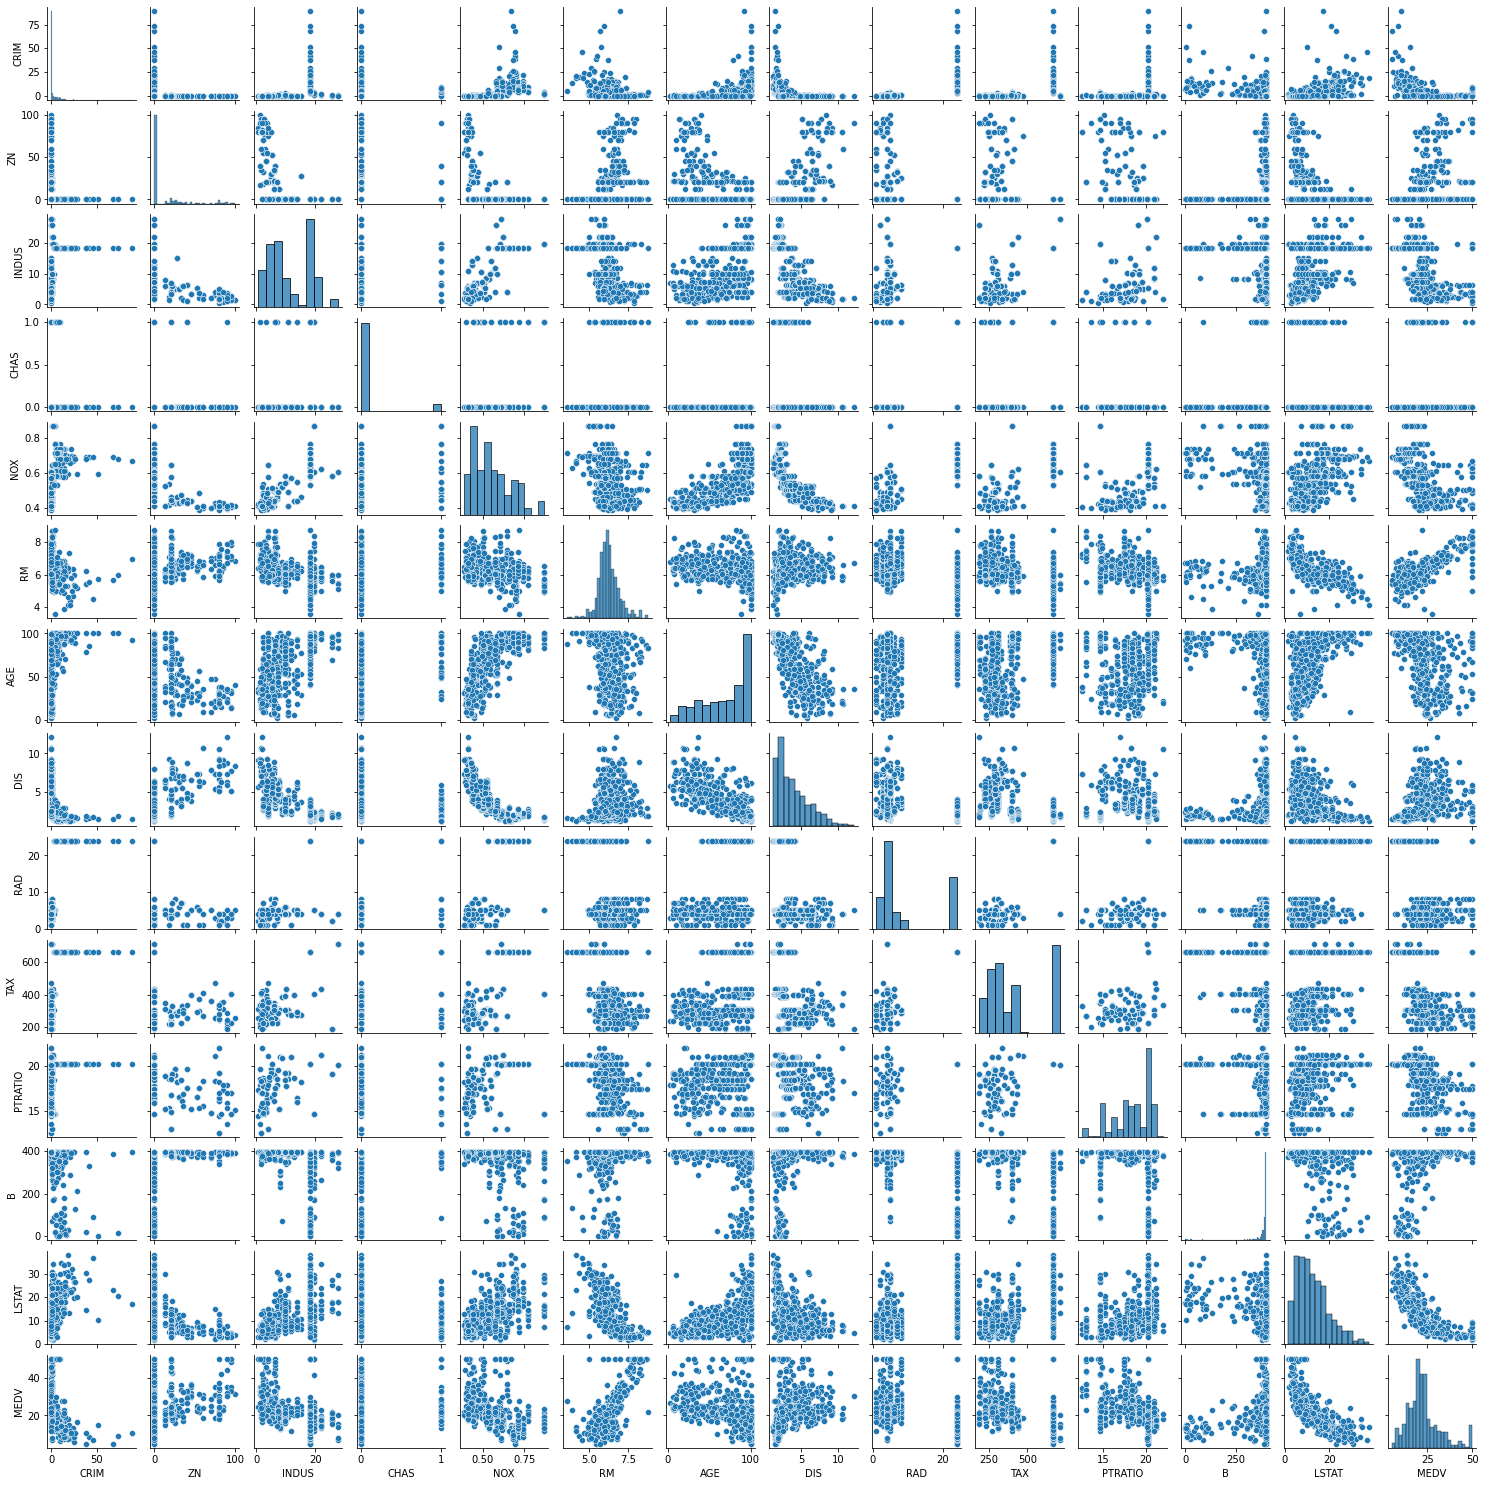

In [10]:
sns.pairplot(df, height=1.5)
plt.show()

In [11]:
col_study = ['CRIM','ZN','INDUS','NOX','RM']

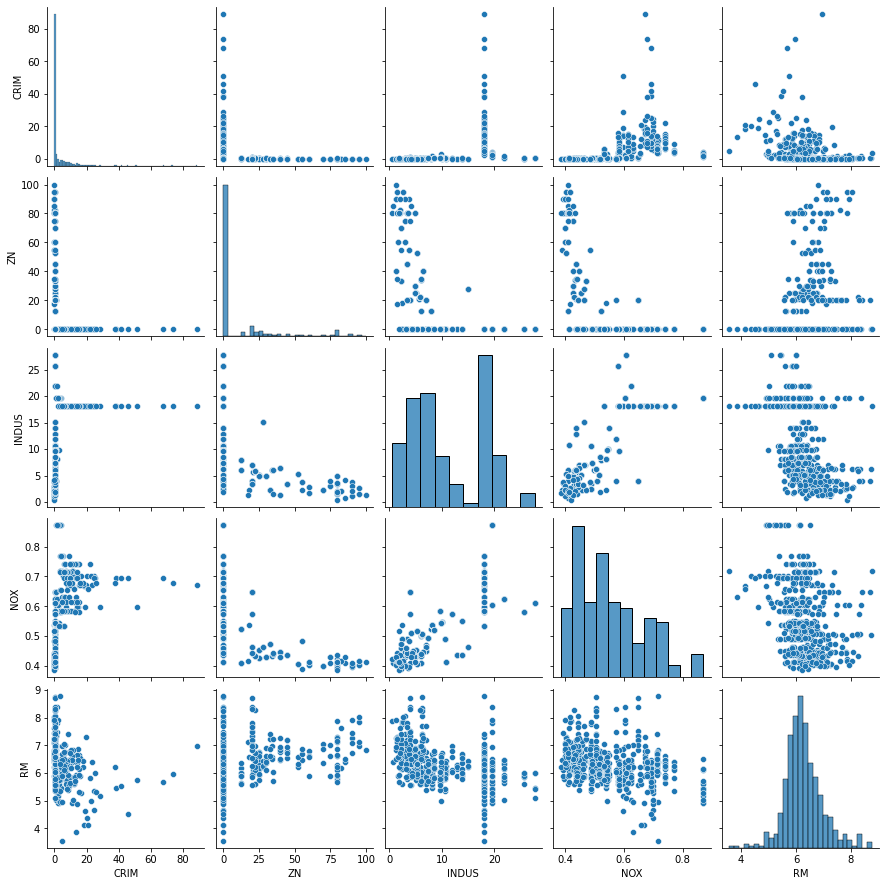

In [12]:
sns.pairplot(df[col_study], height=2.5)
plt.show()

## Correlation Analysis and Feature Selection

In [13]:
pd.options.display.float_format = '{:,.3f}'.format

In [14]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


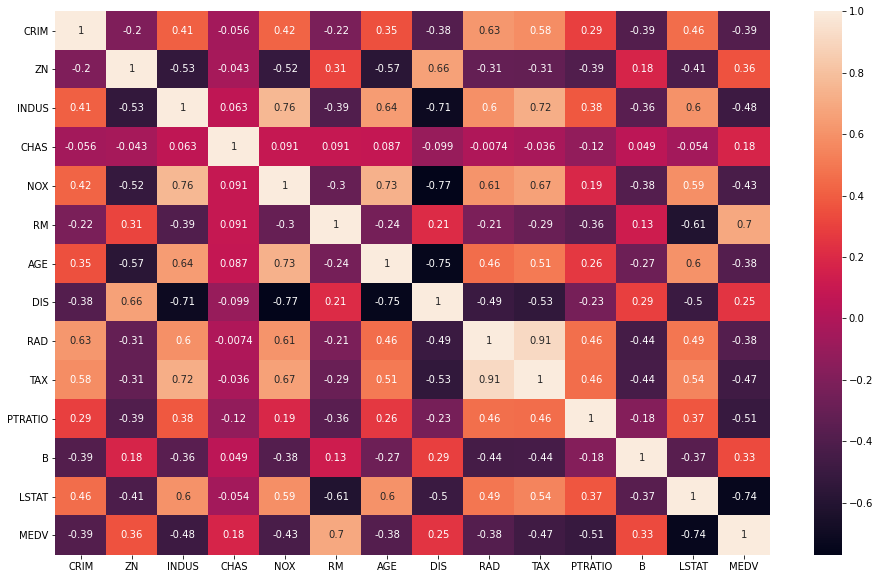

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

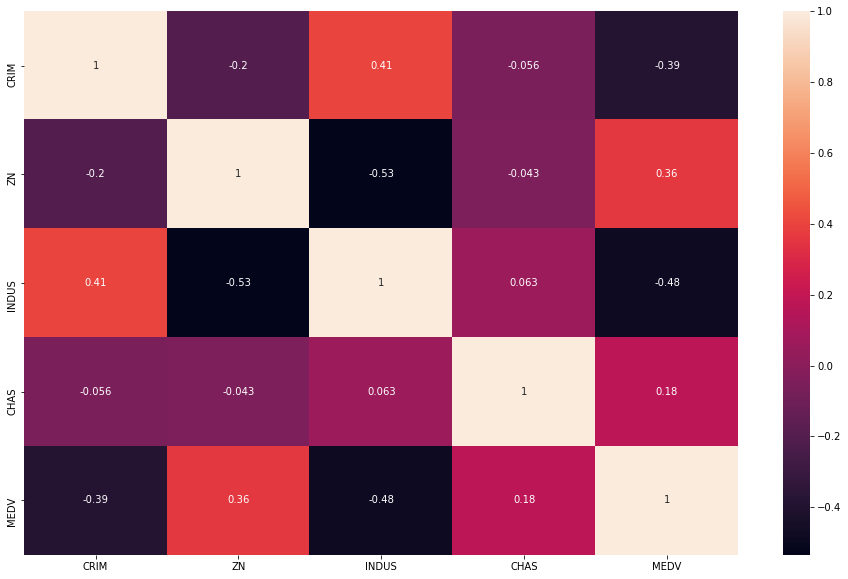

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(df[['CRIM','ZN','INDUS','CHAS','MEDV']].corr(), annot=True)
plt.show()

## Linear Regression with Scikit-Learn

In [17]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330,36.200


In [18]:
X= df['RM'].values.reshape(-1,1)

In [19]:
y= df['MEDV'].values

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X,y)

LinearRegression()

In [23]:
model.coef_

array([9.10210898])

In [24]:
model.intercept_

-34.670620776438554

<function matplotlib.pyplot.show(close=None, block=None)>

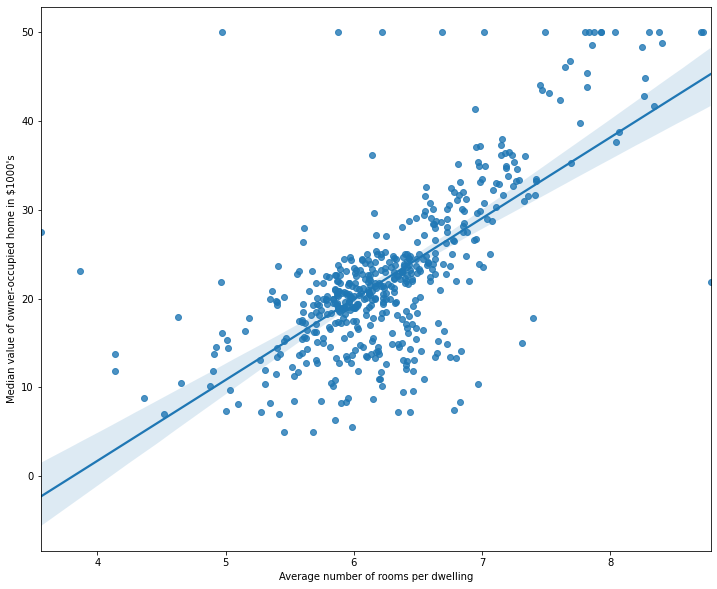

In [25]:
plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y)
plt.xlabel("Average number of rooms per dwelling")
plt.ylabel("Median value of owner-occupied home in $1000's")
plt.show

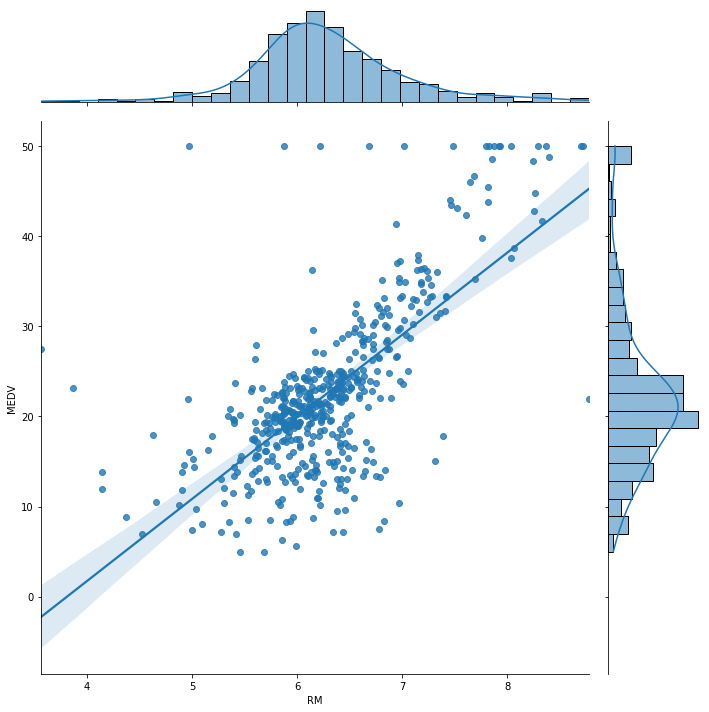

In [26]:
sns.jointplot(x='RM', y='MEDV', data=df, kind='reg', height=10)

In [27]:
model.predict(np.array([7]).reshape(1,-1))

array([29.04414209])

In [28]:
#step 1: Select a model
#step 2:
ml2= LinearRegression()

#step 3:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values

#step 4:
ml2.fit(X,y)

#step 5:
ml2.predict(np.array(15).reshape(1,-1))

array([20.30310057])

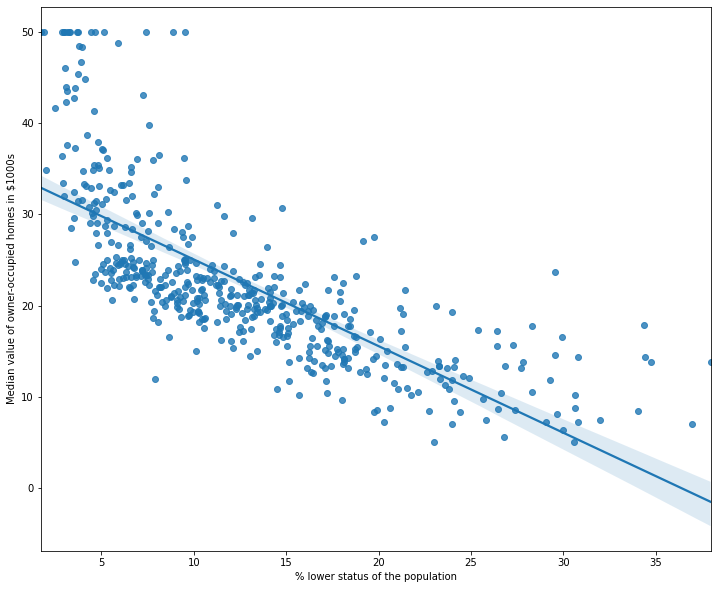

In [29]:
plt.figure(figsize=(12,10))
sns.regplot(x=X,y=y)
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000s')
plt.show()

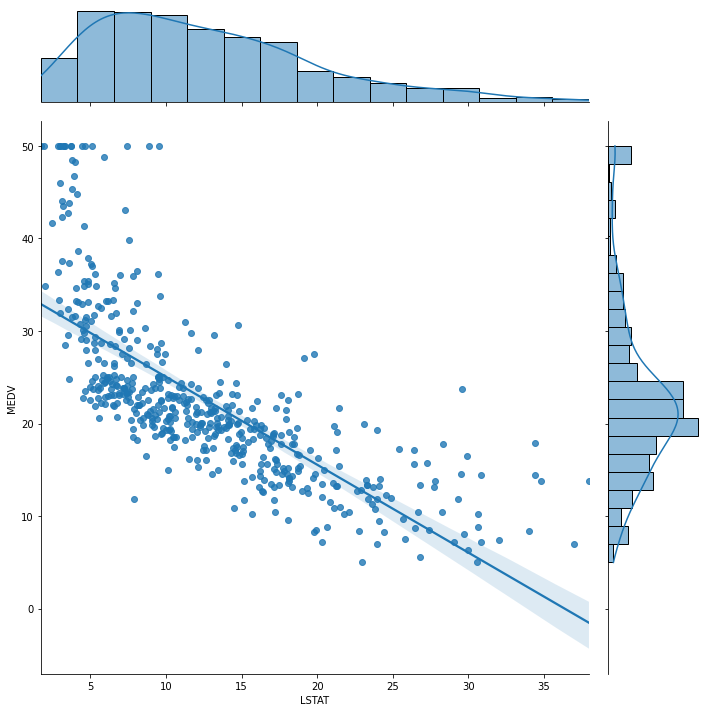

In [30]:
sns.jointplot(x='LSTAT', y='MEDV', data=df, kind='reg', height=10)
plt.show()

## Robust Regression

In [31]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222,18.700,396.900,5.330,36.200


## RANdom SAmple Consensus (RANSAC) Algorithm

In [32]:
X = df['RM'].values.reshape(-1,1)
y = df['MEDV'].values

In [33]:
from sklearn.linear_model import RANSACRegressor

In [34]:
ransac = RANSACRegressor()

In [35]:
ransac.fit(X,y)

RANSACRegressor()

In [36]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [37]:
np.arange(3,10,1)

array([3, 4, 5, 6, 7, 8, 9])

In [38]:
line_X = np.arange(3,10,1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1))

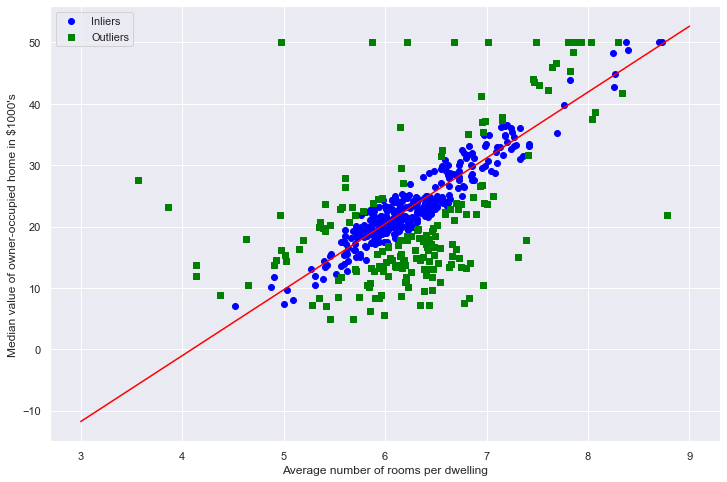

In [39]:
sns.set(style='darkgrid', context = 'notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o',label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='green', marker='s',label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied home in $1000's")
plt.legend(loc='upper left')
plt.show()

In [40]:
ransac.estimator_.coef_

array([10.73823837])

In [41]:
ransac.estimator_.intercept_

-43.9958113947218

________________________________________________________________________________________________________________________________________________________________sns.set(style='darkgrid', context = 'notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o',label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='green', marker='s',label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied home in $1000's")
plt.legend(loc='upper left')
plt.show()

In [42]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0,40,10)
line_y_ransac = ransac.predict(line_X.reshape(-1,1))

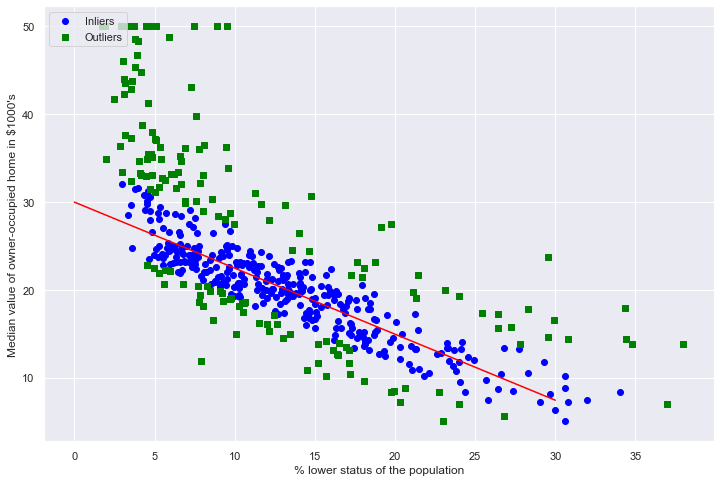

In [43]:
sns.set(style='darkgrid', context = 'notebook')
plt.figure(figsize=(12,8))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o',label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], c='green', marker='s',label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied home in $1000's")
plt.legend(loc='upper left')
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Performance Evaluation of Regression Model

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
#X = df['LSTAT'].values.reshape(-1,1)
X = df.iloc[:,:-1].values

In [46]:
y = df['MEDV'].values

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
y_train_pred = lr.predict(X_train)

In [51]:
y_test_pred = lr.predict(X_test)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Method 1: Residual Analysis

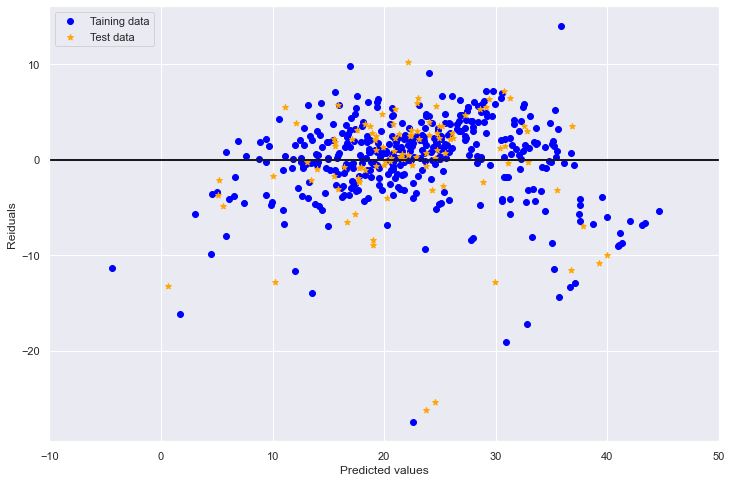

In [52]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Taining data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Reiduals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.xlim([-10, 50])
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## Method 2: Mean Squared Error (MSE)

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
mean_squared_error(y_train, y_train_pred)

19.326470203585725

In [55]:
mean_squared_error(y_test, y_test_pred)

33.44897999767634

## Method 3: Coefficient of Determination R^2

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(y_train, y_train_pred)

0.7730135569264234

In [58]:
r2_score(y_test, y_test_pred)

0.5892223849182531

----------------------------------------------------------------------------------------------------------------------------------------------------------------

## What does a Near Perfect Model Looks Like?

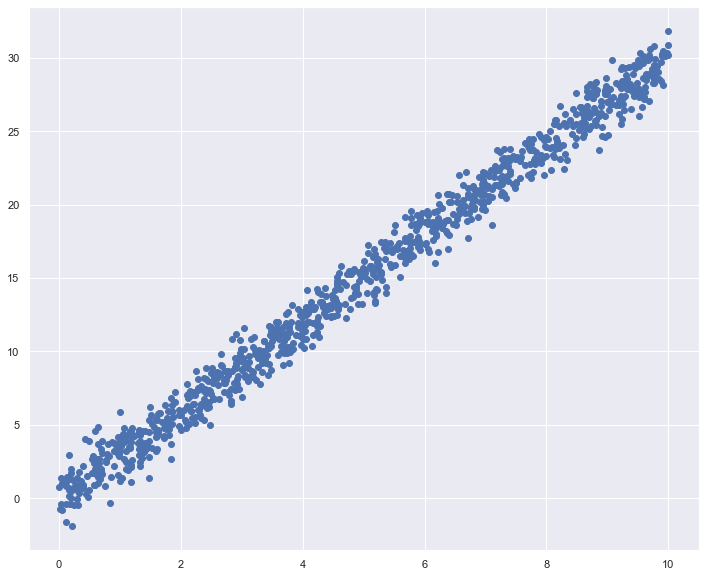

In [59]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize=(12,10))
plt.scatter(x,y)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1,1), y_train)

y_train_pred = model.predict(X_train.reshape(-1,1))
y_test_pred = model.predict(X_test.reshape(-1,1))

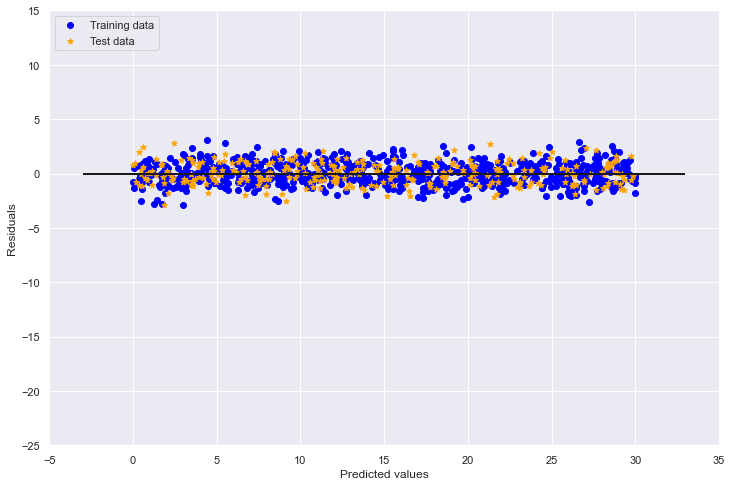

In [63]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5,35])
plt.ylim([-25,15])
plt.show()

## Method 2: Mean Squared Error (MSE)

In [64]:
mean_squared_error(y_train, y_train_pred)

1.003573342459929

In [65]:
mean_squared_error(y_test, y_test_pred)

0.9950241578966262

## Method 3: Coefficient of Determination, R^2

In [66]:
r2_score(y_train, y_train_pred)

0.9869268948730797

In [67]:
r2_score(y_test, y_test_pred)

0.9872950295261633